In [ ]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
import pyart
import os

In [2]:

# Read in the file, create a RadarMapDisplay object
filename = 'MDV-20150805-084449-PPIVol.nc'
radar = pyart.io.read(filename)
display = pyart.graph.RadarMapDisplay(radar)

/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


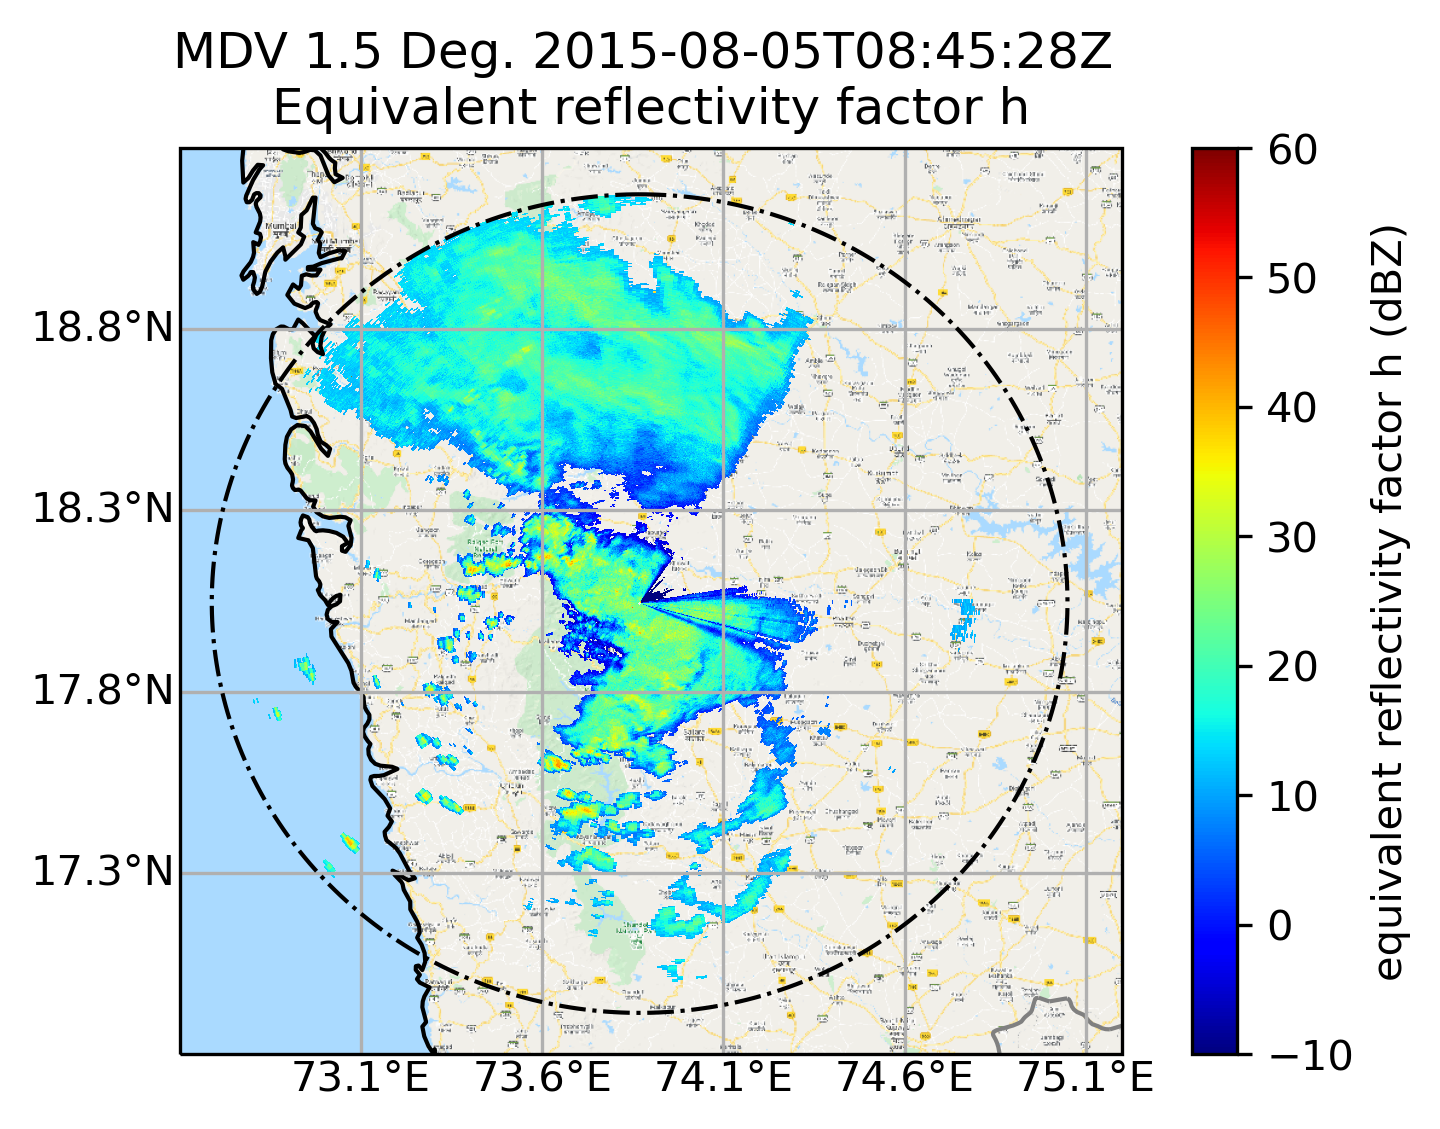

In [3]:
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

request = cimgt.GoogleTiles()
plt.figure(dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([72.6, 75.2, 16.8,19.3])

ax.add_image(request, 10)


ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
SOURCE = 'Natural Earth'
LICENSE = 'public domain'

ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='gray')
#ax.background_img(name='BM', resolution='high')

# Add a text annotation for the license information to the
# the bottom right corner.
display.plot_ppi_map('DBZH', sweep=1, resolution='10m',
                     vmin=-10, vmax=60,lon_lines=np.arange(72.6,75.2, .5),
                     lat_lines=np.arange(16.8,19.3, .5),
                     lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0],
                     projection=ccrs.PlateCarree(), cmap='jet',
                     )
display.plot_range_ring(radar.range['data'][2], line_style='k-.' ,lw='1')
#ax.gridlines(crs=None, draw_labels=False, xlocs=None, ylocs=None)

plt.show()


from mpl_toolkits.basemap import Basemap
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
#plt.figure(dpi=300)
plt.figure(dpi=300)
m = Basemap(llcrnrlon=72.6,llcrnrlat=16.8,urcrnrlon=75.2,urcrnrlat=19.3,projection='lcc',
            resolution='h',lat_1=16.8,lat_2=19.3,lat_0=18.,lon_0=73.9)

#m.bluemarble()
m.etopo(scale=1)

m.drawcoastlines()

plt.show()